In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

In [5]:
train = pd.read_csv("/kaggle/input/finance-company-loan-data/train_ctrUa4K.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test = pd.read_csv("/kaggle/input/finance-company-loan-data/test_lAUu6dG.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# **Data Processing Part1**

In [7]:
train.drop(columns=["Loan_ID"], inplace=True)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# finding the percentage of missing values columnwise

In [8]:
missing = train.isnull().sum()*100/ train.shape[0]
missing[missing>0].sort_values(ascending=False)

Credit_History      8.143322
Self_Employed       5.211726
LoanAmount          3.583062
Dependents          2.442997
Loan_Amount_Term    2.280130
Gender              2.117264
Married             0.488599
dtype: float64

In [9]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
train['Credit_History'].fillna(0,inplace=True)
train['Self_Employed'].fillna('No',inplace=True)
train['LoanAmount'].fillna(0,inplace=True)
train['Dependents'].fillna('Other',inplace=True)
train['Loan_Amount_Term'].fillna(0,inplace=True)
train['Gender'].fillna('Other',inplace=True)
train['Married'].fillna('Other',inplace=True)

In [11]:
missing = train.isnull().sum()*100/ train.shape[0]
missing[missing>0].sort_values(ascending=False)

Series([], dtype: float64)

# Exploratory Data Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

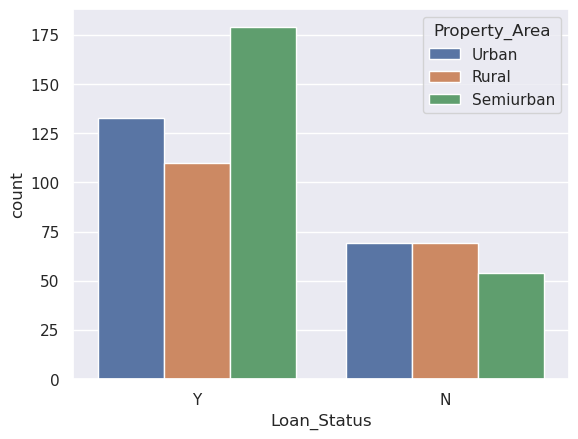

In [12]:
sns.countplot(data=train,x='Loan_Status',hue ='Property_Area')

people living in suburban has high acceptable chance of loan status

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

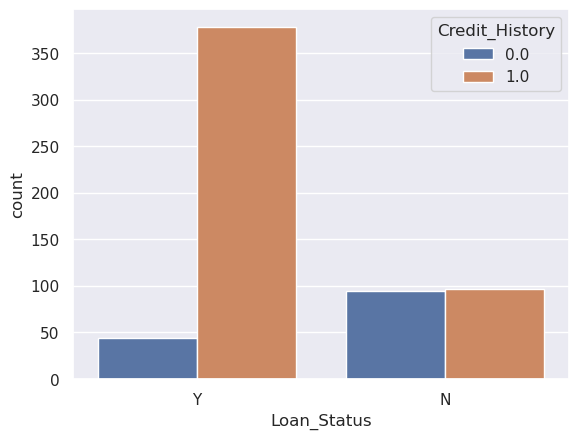

In [13]:
sns.countplot(data=train,x='Loan_Status',hue ='Credit_History')

from this we can infer that, people with acceptable past credit history are most likely accepted in new loan.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

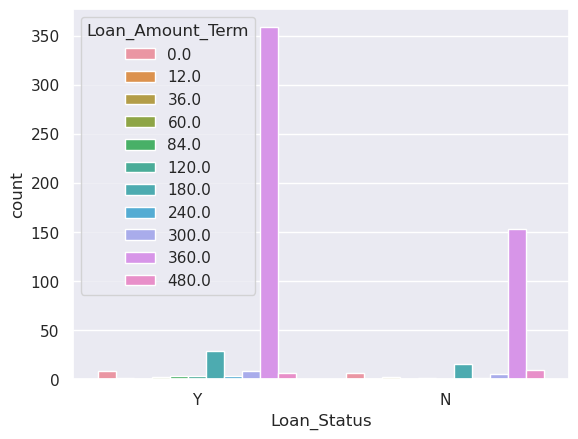

In [14]:
sns.countplot(data=train,x='Loan_Status',hue ='Loan_Amount_Term')

people with 360 month loan term are mostly to be accepted

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

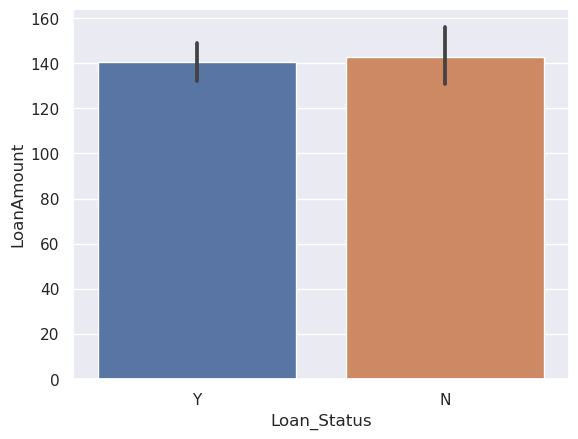

In [15]:
sns.barplot(data=train,x='Loan_Status',y ='LoanAmount')

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

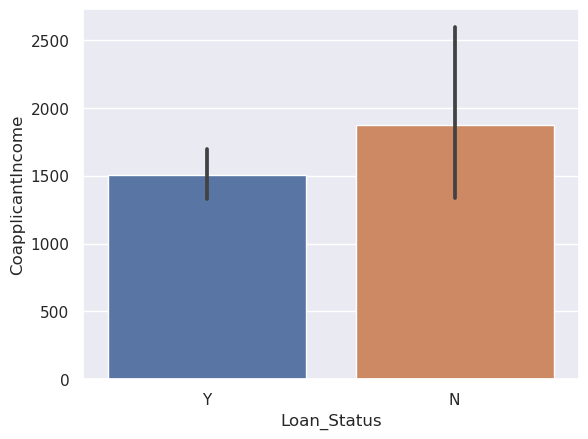

In [16]:
sns.barplot(data=train,x='Loan_Status',y ='CoapplicantIncome')

people with high coapplicant income are mostly accepted to new loan

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

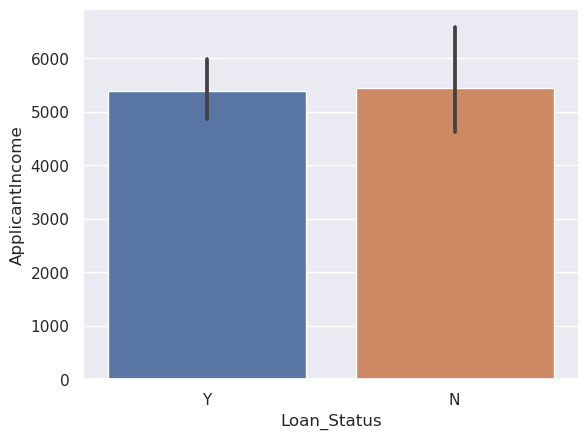

In [17]:
sns.barplot(data=train,x='Loan_Status',y='ApplicantIncome')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

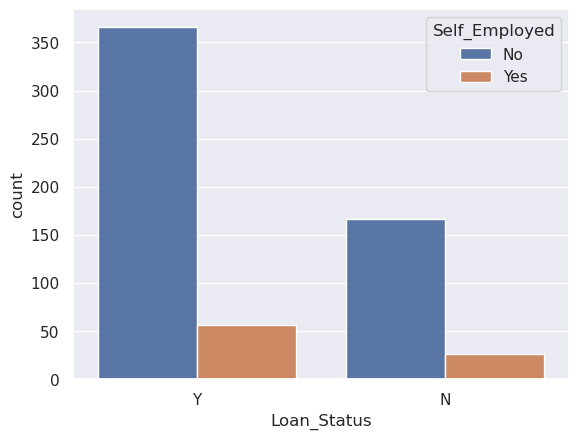

In [18]:
sns.countplot(data=train,x='Loan_Status',hue ='Self_Employed')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

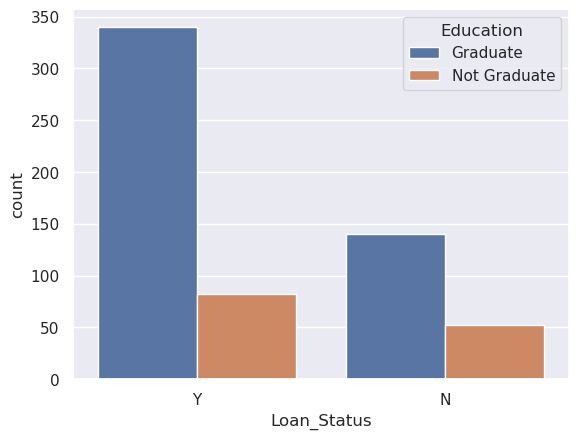

In [19]:
sns.countplot(data=train,x='Loan_Status',hue ='Education')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

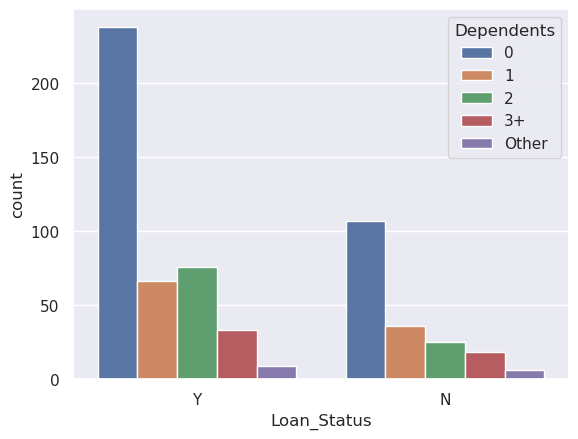

In [20]:
sns.countplot(data=train,x='Loan_Status',hue ='Dependents')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

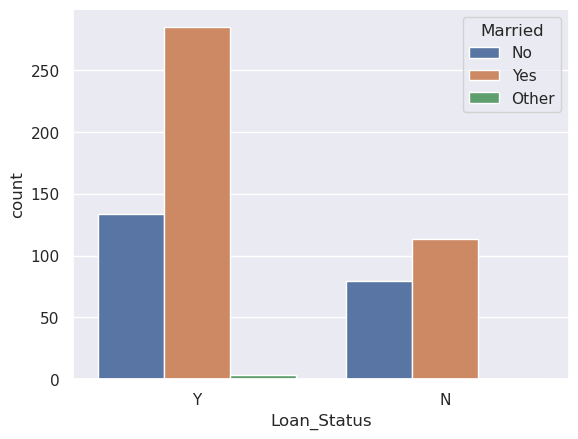

In [21]:
sns.countplot(data=train,x='Loan_Status',hue ='Married')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

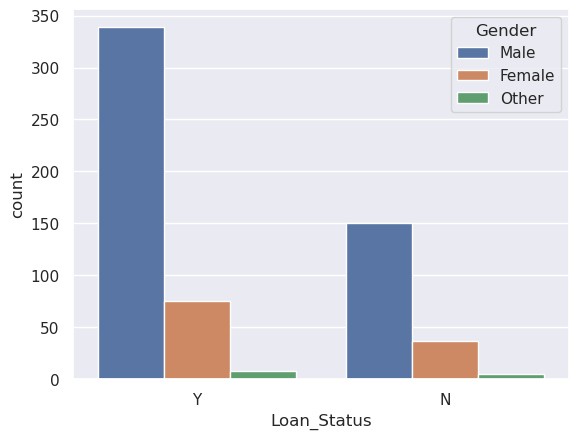

In [22]:
sns.countplot(data=train,x='Loan_Status',hue ='Gender')



# Data Preprocessing Part-II

In [23]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [24]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [25]:
train['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [26]:
train['Married'].unique()

array(['No', 'Yes', 'Other'], dtype=object)

In [27]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', 'Other'], dtype=object)

In [28]:
train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [29]:
train['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [31]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [32]:
train['Loan_Amount_Term'].unique()

array([360., 120., 240.,   0., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [33]:
train['Gender'] = label_encoder.fit_transform(train['Gender'])
train['Gender'].unique()

array([1, 0, 2])

In [34]:
train['Married'] = label_encoder.fit_transform(train['Married'])
train['Married'].unique()

array([0, 2, 1])

In [35]:
train['Dependents']=label_encoder.fit_transform(train['Dependents'])
train['Dependents'].unique()

array([0, 1, 2, 3, 4])

In [36]:
train['Education'] = label_encoder.fit_transform(train['Education'])
train["Education"].unique()

array([0, 1])

In [37]:
train['Self_Employed'] = label_encoder.fit_transform(train['Self_Employed'])
train['Self_Employed'].unique()

array([0, 1])

In [38]:
train['Property_Area'] = label_encoder.fit_transform(train['Property_Area'])
train['Property_Area'].unique()

array([2, 0, 1])

In [39]:
train['Loan_Amount_Term'] = label_encoder.fit_transform(train['Loan_Amount_Term'])
train['Loan_Amount_Term'].unique()

array([ 9,  5,  7,  0,  6,  3,  8, 10,  2,  4,  1])

In [40]:
train['Loan_Status'] = label_encoder.fit_transform(train['Loan_Status'])
train['Loan_Status'].unique()

array([1, 0])

# **Check the  Outlier**

<AxesSubplot:xlabel='ApplicantIncome'>

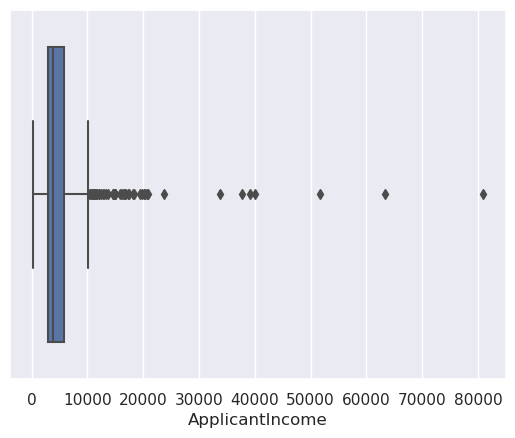

In [41]:
sns.boxplot(x=train['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome'>

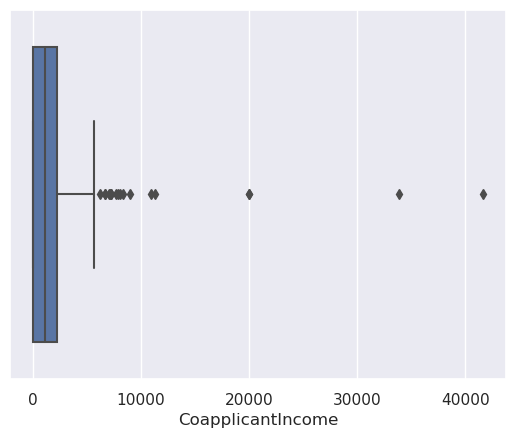

In [42]:
sns.boxplot(x=train['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount'>

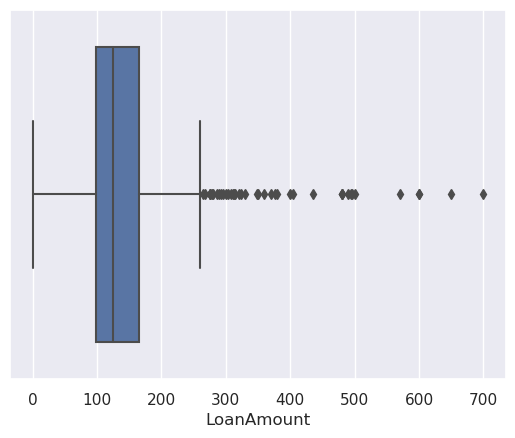

In [43]:
sns.boxplot(x=train['LoanAmount'])

# Balanced Class Data

In [44]:
import scipy.stats as stats
z = np.abs(stats.zscore(train))
data_clean = train[(z<3).all(axis = 1)]
data_clean.shape

(572, 12)

1    398
0    174
Name: Loan_Status, dtype: int64

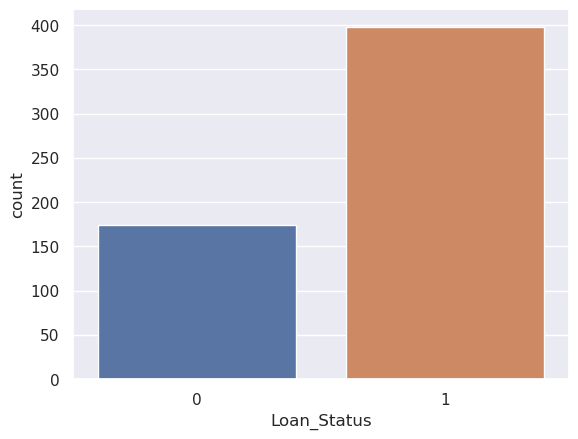

In [45]:
sns.countplot(data = data_clean, x='Loan_Status')
data_clean['Loan_Status'].value_counts()

In [46]:
from sklearn.utils import resample
#we are about to create two different dataframe of majority and minority class
df_majority = data_clean[(data_clean['Loan_Status']==1)]
df_minority = data_clean[(data_clean['Loan_Status']==0)]
#now we are upsampling minority class
df_minority_upsampled = resample(df_minority,
                                 replace = True, #sample with replacements
                                 n_samples = 398, #to match majority class
                                 random_state = 0) #reproducible results
#combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled,df_majority])

0    398
1    398
Name: Loan_Status, dtype: int64

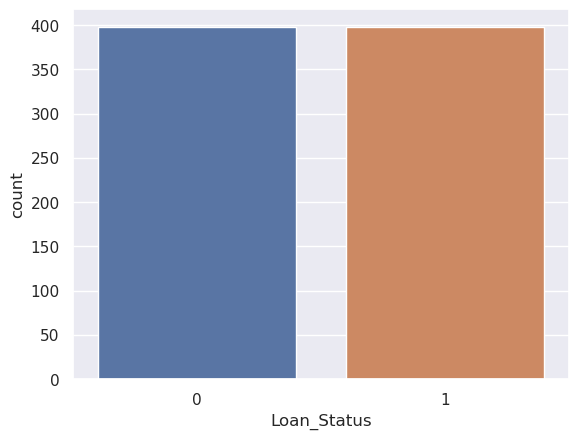

In [47]:
sns.countplot(data=df_upsampled,x='Loan_Status')
df_upsampled['Loan_Status'].value_counts()

# Data correlaton

<AxesSubplot:>

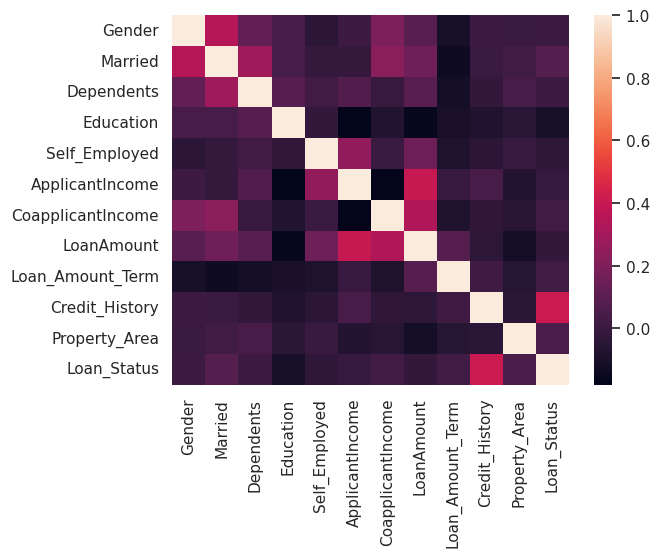

In [48]:
sns.heatmap(df_upsampled.corr(),fmt='2g')

# **Building Machine Learning Model**

In [49]:
x = df_upsampled.drop('Loan_Status', axis=1)
y = df_upsampled['Loan_Status']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

# **Decision Tree**

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [52]:
y_pred = dtree.predict(x_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 81.25 %


In [53]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('f-1 score:',(f1_score(y_test,y_pred)))
print('Precision score:',(precision_score(y_test,y_pred)))
print('Recall Score:',(recall_score(y_test,y_pred)))

f-1 score: 0.7972972972972974
Precision score: 0.855072463768116
Recall Score: 0.7468354430379747


# **Random Forest**

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [55]:
y_pred = rfc.predict(x_test)
print("Accuracy:",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy: 87.5 %


In [56]:
print('f-1 score:',(f1_score(y_test,y_pred)))
print('Precision score:',(precision_score(y_test,y_pred)))
print('Recall Score:',(recall_score(y_test,y_pred)))

f-1 score: 0.8717948717948718
Precision score: 0.8831168831168831
Recall Score: 0.8607594936708861


# **Logistic Regression**

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

In [58]:
y_pred = lr.predict(x_test)
print("Accuracy Score:",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score: 68.75 %


In [59]:
print('f-1 score:',(f1_score(y_test,y_pred)))
print('Precision score:',(precision_score(y_test,y_pred)))
print('Recall Score:',(recall_score(y_test,y_pred)))

f-1 score: 0.7252747252747253
Precision score: 0.6407766990291263
Recall Score: 0.8354430379746836
